In [11]:
import numpy as np
f = open('p8_1.txt', mode='r')

Преобразование текста в матрицу

In [12]:
A = list(map(int,list(f.read().replace('\n',''))))
A = np.array(A)
N = int(np.sqrt(A.size))
A = A.reshape([N,-1])

Функция проверки видимости слева направа или (rev=true) справа налево

In [13]:
def side_view(A,rev=False):
    A_ = np.zeros(A.shape)-.1
    if rev:
        for i in range(N-2,-1,-1):
            A_[i] = A.T[i+1:].max(axis=0)
    else:
        for i in range(1,N):
            try:
                A_[i] = A.T[:i].max(axis=0)
            except ValueError:
                A_[i] = A.T[i-1]
    return (A)>A_.T

In [72]:
# просто логическое И для результатов со всех 4х сторон и сумма значений  True по всей карте

In [14]:
(side_view(A, rev=True)+side_view(A.T, rev=True).T+side_view(A)+side_view(A.T).T).sum()

1672

# Задание 2

In [18]:
from matplotlib import pyplot as plt

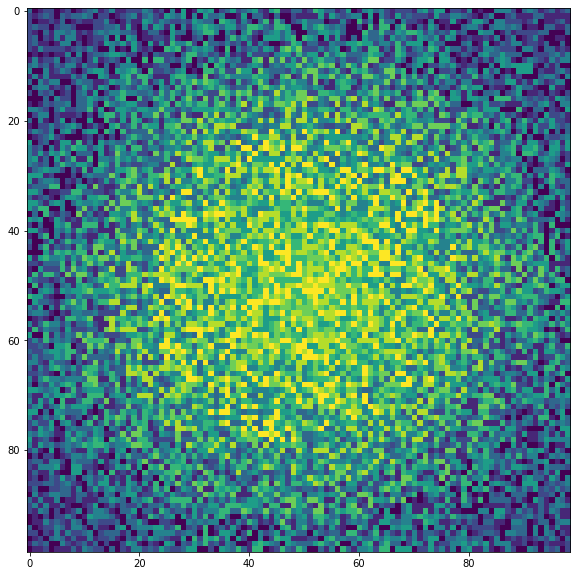

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(A)

In [51]:
vertex_map = np.zeros(A.shape)
vertex_address = []
for i in range(1,N-1):
    for j in range(1,N-1):
        vertex_map[i,j] = (A[i,j]>A[i+1,j]) and (A[i,j]>A[i-1,j]) and (A[i,j]>A[i,j+1]) and (A[i,j]>A[i,j-1])
        if vertex_map[i,j]:
            vertex_address.append((i,j))

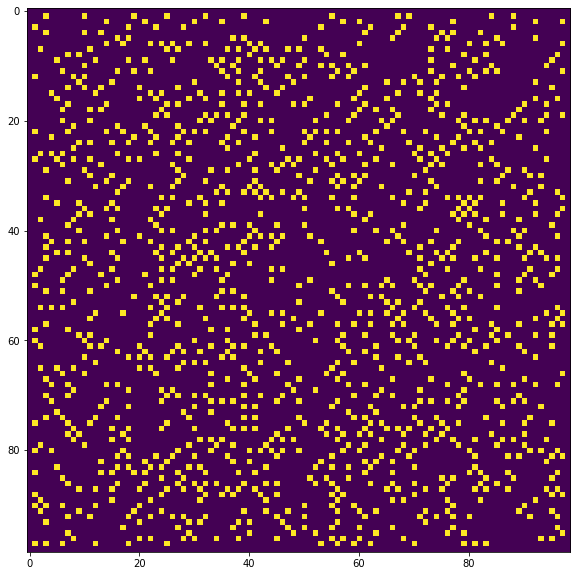

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(vertex_map)

In [67]:
def score_view(Map,idx):
    i, j = idx
    N = Map[0].size
    w, n, e, s = 1, 1, 1, 1 #west, north, east, south distances

    while Map[i, j] > Map[i-w, j] and i>w:
        w += 1
    while Map[i, j] > Map[i, j-n] and j>n:
        n += 1
    while Map[i, j] > Map[i+e, j] and i+e < N-1:
        e += 1
    while Map[i, j] > Map[i, j+s] and j+s < N-1:
        s += 1
    return w*n*e*s

prestige_map = np.zeros([N,N])
for idx in vertex_address:
    prestige_map[idx] = score_view(A, idx)

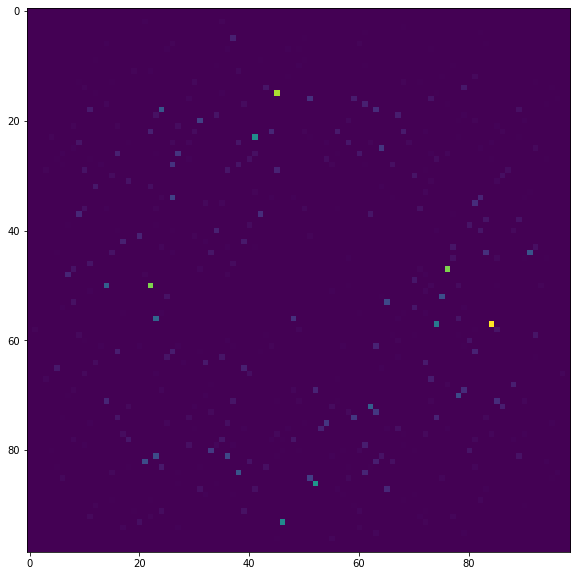

In [68]:
plt.figure(figsize=(10,10))
plt.imshow(prestige_map)

In [69]:
prestige_map.max()

327180.0